In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
# Load the dataset
file_path = "improved_questionnaire_responses.csv"
df = pd.read_csv(file_path)

# Preview the dataset
print(df.head())

   Gender       Age  Education Level Work Experience  \
0    Male  36 to 40          Diploma         6 to 10   
1    Male  18 to 25          Diploma         Over 10   
2  Female  18 to 25          Diploma         Over 10   
3    Male  36 to 40          Diploma          2 to 5   
4  Female   Over 40  O level/A level          2 to 5   

   The bank always comes up with new products into the market.  \
0                                                  3             
1                                                  3             
2                                                  3             
3                                                  4             
4                                                  4             

   The new products in the market are always well received by the customers.  \
0                                                  4                           
1                                                  2                           
2                         

In [24]:
# Data Preprocessing
# Rename columns for simplicity
df.rename(columns=lambda x: x.strip().replace(" ", "_").lower(), inplace=True)

In [25]:
# Convert categorical variables (like gender, age, etc.) to numeric
categorical_columns = ['gender', 'age', 'education_level', 'work_experience']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [26]:
# Dependent and independent variables for regression
variables = {
    "innovation": [
        "each_coop_bank_branch_has_an_automated_teller_machine_(atm)",
        "many_customers_prefer_to_withdraw_money_from_an_atm_as_opposed_to_counter_withdrawals",
        "many_customers_use_internet_banking",
        "the_branch_has_many_coop_bank_agents_(coop_kwa_jirani)"
    ],
    "product_development": [
        "the_bank_always_comes_up_with_new_products_into_the_market",
        "the_new_products_in_the_market_are_always_well_received_by_the_customers",
        "customers_are_fully_conversant_with_the_new_products_offered_by_the_bank"
    ],
    "corporate_banking": [
        "the_cooperative_bank_of_kenya_serves_both_retail_and_corporate_customers",
        "many_corporate_customers_prefer_coop_banks_to_other_competitors",
        "the_bank_provides_credit_facilities_to_many_corporate_customers"
    ],
    "capital_base": [
        "the_bank_has_a_large_capital_base_that_greatly_contributes_to_its_profitability",
        "the_bank_acquired_part_of_its_large_capital_base_from_an_initial_public_offer_(ipo)",
        "the_bank_keeps_part_of_its_net_profit_as_retained_earnings"
    ]
}


In [27]:
print(df.columns)


Index(['the_bank_always_comes_up_with_new_products_into_the_market.',
       'the_new_products_in_the_market_are_always_well_received_by_the_customers.',
       'customers_are_fully_conversant_with_the_new_products_offered_by_the_bank.',
       'the_bank_has_a_well_worked_out_program_for_coming_up_with_new_products.',
       'the_bank_has_a_team_mandated_with_identifying_market_gaps_and_coming_up_with_new_innovative_products_to_fill_the_gap.',
       'the_bank_uses_innovative_methods_in_marketing_its_new_products.',
       'many_customers_take_on_the_bank’s_new_products_after_being_adequately_informed_about_them.',
       'the_bank_makes_more_profits_from_the_new_products_it_introduces.',
       'each_coop_bank_branch_has_an_automated_teller_machine_(atm)',
       'many_customers_prefer_to_withdraw_money_from_an_atm_as_opposed_to_counter_withdrawals',
       'many_customers_use_internet_banking',
       'the_branch_has_many_coop_bank_agents_(coop_kwa_jirani)',
       'a_suitable_number

In [28]:
# Standardize column names
df.columns = (
    df.columns.str.rstrip('.')
    .str.replace(' ', '_')
    .str.replace("’", "'")
    .str.lower()
)

# Verify column names
print("Updated Columns:", df.columns.tolist())

# Check for missing columns
for key, features in variables.items():
    missing_columns = [col for col in features if col not in df.columns]
    if missing_columns:
        print(f"Missing columns for {key}: {missing_columns}")
    else:
        print(f"All columns for {key} are present.")

# Process variables
results = {}
for key, features in variables.items():
    try:
        X = df[features]
        y = df['corporate_banking_has_led_to_a_competitive_advantage_of_the_bank_over_other_competitors']
        # Proceed with your ML pipeline
        
    except KeyError as e:
        print(f"KeyError for {key}: {e}")


Updated Columns: ['the_bank_always_comes_up_with_new_products_into_the_market', 'the_new_products_in_the_market_are_always_well_received_by_the_customers', 'customers_are_fully_conversant_with_the_new_products_offered_by_the_bank', 'the_bank_has_a_well_worked_out_program_for_coming_up_with_new_products', 'the_bank_has_a_team_mandated_with_identifying_market_gaps_and_coming_up_with_new_innovative_products_to_fill_the_gap', 'the_bank_uses_innovative_methods_in_marketing_its_new_products', "many_customers_take_on_the_bank's_new_products_after_being_adequately_informed_about_them", 'the_bank_makes_more_profits_from_the_new_products_it_introduces', 'each_coop_bank_branch_has_an_automated_teller_machine_(atm)', 'many_customers_prefer_to_withdraw_money_from_an_atm_as_opposed_to_counter_withdrawals', 'many_customers_use_internet_banking', 'the_branch_has_many_coop_bank_agents_(coop_kwa_jirani)', 'a_suitable_number_of_customers_use_agency_banking_to_do_their_transactions', 'the_bank_employs_ade

In [31]:
# Required imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Standardize column names
df.columns = (
    df.columns.str.rstrip('.')
    .str.replace(' ', '_')
    .str.replace("’", "'")
    .str.lower()
)

# Verify column names
print("Updated Columns:", df.columns.tolist())

# Check for missing columns
for key, features in variables.items():
    missing_columns = [col for col in features if col not in df.columns]
    if missing_columns:
        print(f"Missing columns for {key}: {missing_columns}")
    else:
        print(f"All columns for {key} are present.")

# Process variables
results = {}
for key, features in variables.items():
    try:
        # Prepare feature matrix and target variable
        X = df[features]
        y = df['corporate_banking_has_led_to_a_competitive_advantage_of_the_bank_over_other_competitors']
        
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Train model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predictions and evaluation
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        results[key] = {"R2_Score": r2, "MSE": mse}
        
        # Print summary
        print(f"Regression Analysis for {key.replace('_', ' ').capitalize()}:")
        print(f"R2 Score: {r2:.2f}")
        print(f"Mean Squared Error: {mse:.2f}\n")
    
    except KeyError as e:
        print(f"KeyError for {key}: {e}")


Updated Columns: ['the_bank_always_comes_up_with_new_products_into_the_market', 'the_new_products_in_the_market_are_always_well_received_by_the_customers', 'customers_are_fully_conversant_with_the_new_products_offered_by_the_bank', 'the_bank_has_a_well_worked_out_program_for_coming_up_with_new_products', 'the_bank_has_a_team_mandated_with_identifying_market_gaps_and_coming_up_with_new_innovative_products_to_fill_the_gap', 'the_bank_uses_innovative_methods_in_marketing_its_new_products', "many_customers_take_on_the_bank's_new_products_after_being_adequately_informed_about_them", 'the_bank_makes_more_profits_from_the_new_products_it_introduces', 'each_coop_bank_branch_has_an_automated_teller_machine_(atm)', 'many_customers_prefer_to_withdraw_money_from_an_atm_as_opposed_to_counter_withdrawals', 'many_customers_use_internet_banking', 'the_branch_has_many_coop_bank_agents_(coop_kwa_jirani)', 'a_suitable_number_of_customers_use_agency_banking_to_do_their_transactions', 'the_bank_employs_ade

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

# Sample dataset (replace with your actual data)
data = {
    "Product Development": [0.391, 0.45, 0.33, 0.41],
    "Innovation": [0.337, 0.40, 0.39, 0.35],
    "Corporate Banking": [0.406, 0.42, 0.40, 0.38],
    "Capital Base": [0.378, 0.41, 0.36, 0.39]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Standardize the data (Factor Analysis is sensitive to the scale of the data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform Factor Analysis - Set number of components (factors) to 2, you can tune this based on your needs
fa = FactorAnalysis(n_components=2, random_state=42)
fa.fit(scaled_data)

# Print factor loadings (this shows the contribution of each variable to the factor)
factor_loadings = fa.components_
factor_loadings_df = pd.DataFrame(factor_loadings, columns=df.columns)

print("Factor Loadings:")
print(factor_loadings_df)

# To get explained variance for each factor
# Compute the factor variance (variance of each factor)
factor_variance = fa.noise_variance_
print("\nNoise Variance (Explained variance for each factor):")
print(factor_variance)


Factor Loadings:
   Product Development  Innovation  Corporate Banking  Capital Base
0            -0.996158   -0.119182          -0.330572     -0.996059
1             0.079816   -0.983021          -0.452617     -0.080018

Noise Variance (Explained variance for each factor):
[0.00130947 0.02077569 0.68820293 0.00145279]


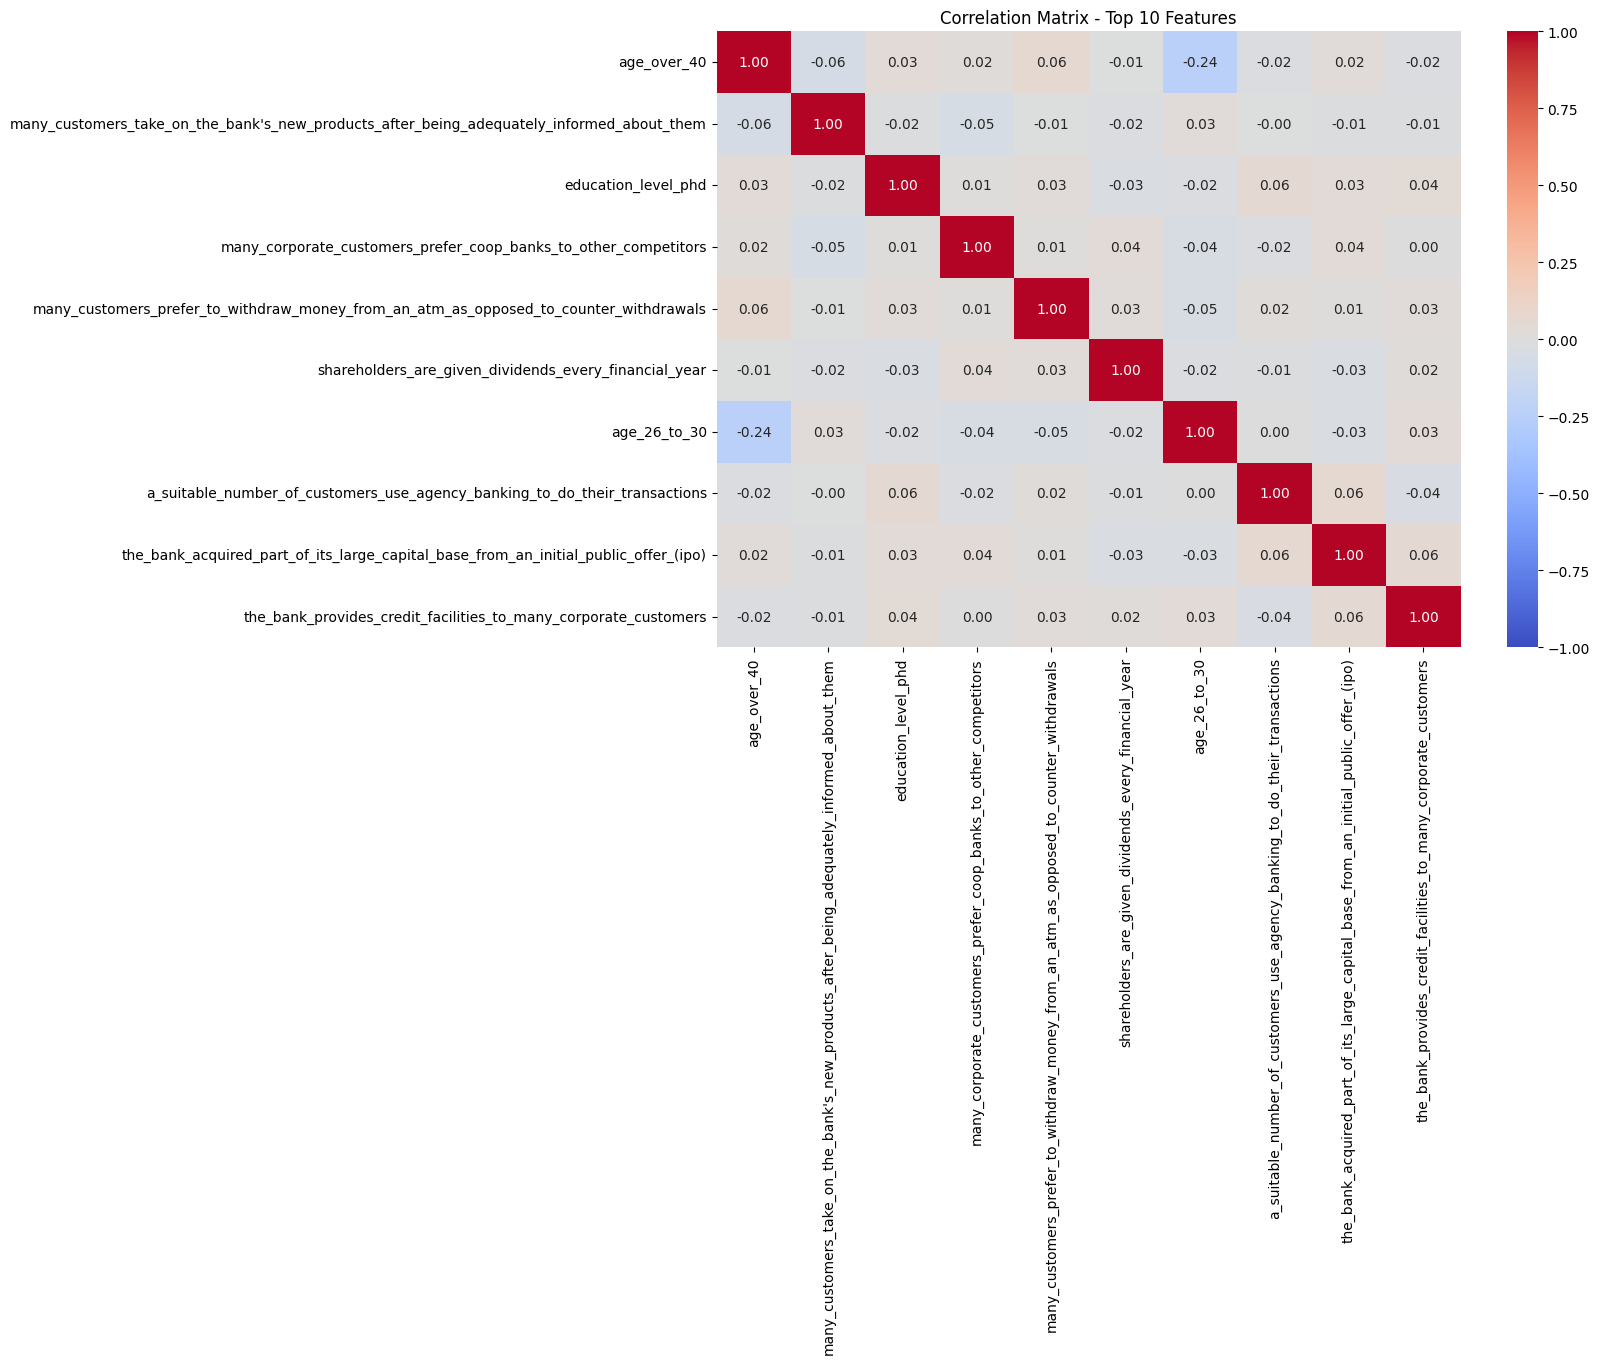

In [30]:
# Define target column
target_column = 'corporate_banking_has_led_to_a_competitive_advantage_of_the_bank_over_other_competitors'

# Compute correlations
correlations = df.corr()[target_column].drop(target_column)  # Drop self-correlation

# Get top 10 features with the highest correlation
top10_features = correlations.abs().nlargest(10).index  # Get indices of top 10 correlations
top10_corr = df[top10_features].corr()  # Correlation matrix for top 10 features

# Visualization - Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top10_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix - Top 10 Features")
plt.show()

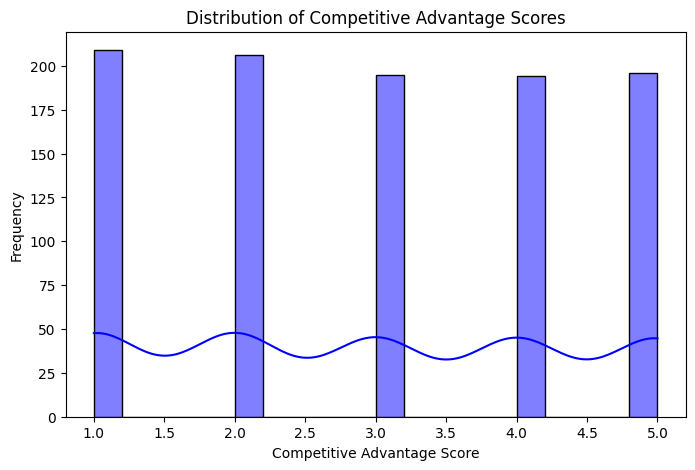

In [16]:
# Distribution of Competitive Advantage Scores
plt.figure(figsize=(8, 5))
sns.histplot(df['corporate_banking_has_led_to_a_competitive_advantage_of_the_bank_over_other_competitors'], kde=True, bins=20, color="blue")
plt.title("Distribution of Competitive Advantage Scores")
plt.xlabel("Competitive Advantage Score")
plt.ylabel("Frequency")
plt.show()

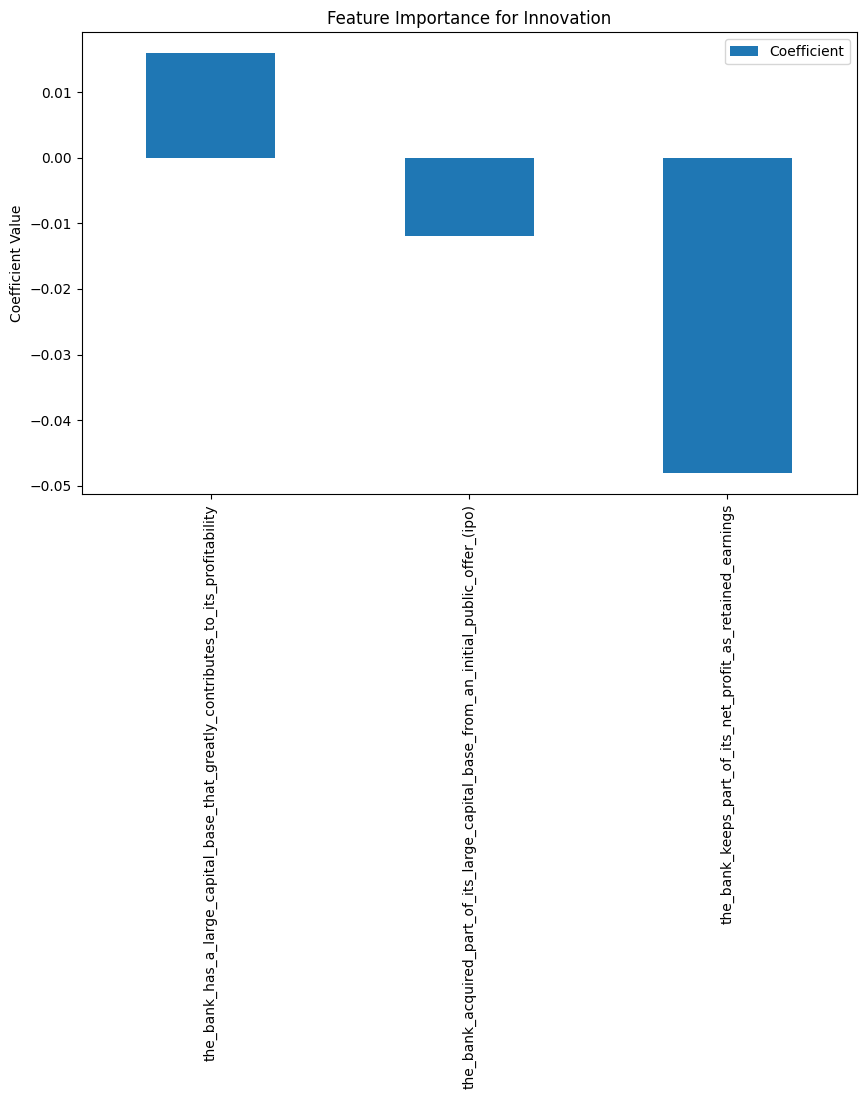

In [21]:
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=["Coefficient"])
coefficients.sort_values(by="Coefficient", ascending=False).plot(kind="bar", figsize=(10, 6))
plt.title("Feature Importance for Innovation")
plt.ylabel("Coefficient Value")
plt.show()

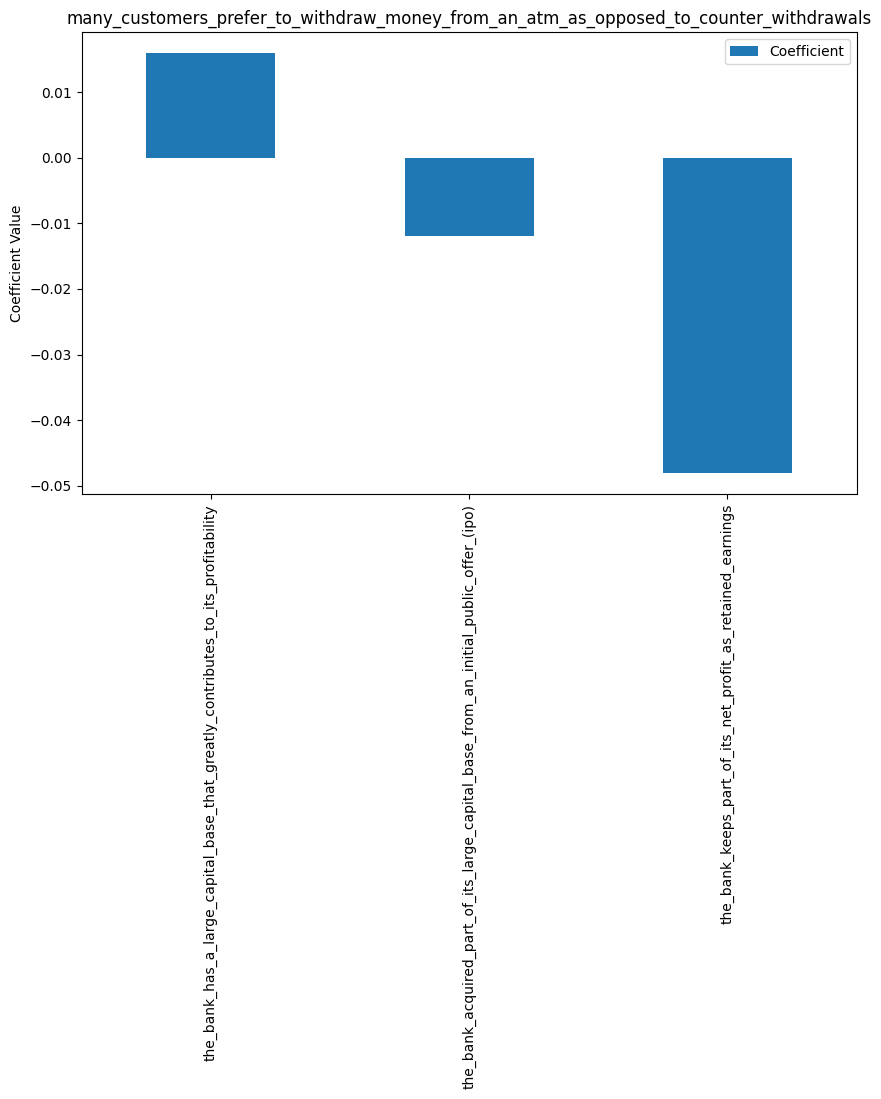

In [22]:
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=["Coefficient"])
coefficients.sort_values(by="Coefficient", ascending=False).plot(kind="bar", figsize=(10, 6))
plt.title("many_customers_prefer_to_withdraw_money_from_an_atm_as_opposed_to_counter_withdrawals")
plt.ylabel("Coefficient Value")
plt.show()